# Time series data Preprocessing.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Read the Data

In [2]:
# def parser(s):
#     return datetime.strptime(s, '%Y-%m')

In [3]:
df = pd.read_csv('ice_cream_vs_heater.csv')

In [4]:
df["Month"]= pd.to_datetime(df['Month'])

In [5]:
df["Month"]

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
193   2020-02-01
194   2020-03-01
195   2020-04-01
196   2020-05-01
197   2020-06-01
Name: Month, Length: 198, dtype: datetime64[ns]

In [6]:
df["Month"] = pd.to_datetime(df["Month"]).dt.strftime('%d-%m-%Y')


In [7]:
df["Month"]

0      01-01-2004
1      01-02-2004
2      01-03-2004
3      01-04-2004
4      01-05-2004
          ...    
193    01-02-2020
194    01-03-2020
195    01-04-2020
196    01-05-2020
197    01-06-2020
Name: Month, Length: 198, dtype: object

In [8]:
df = df[["Month","heater"]]

In [9]:
df.set_index('Month', inplace=True)

In [10]:
df

,heater
Month,
01-01-2004,27
01-02-2004,18
01-03-2004,14
01-04-2004,13
01-05-2004,13
...,...
01-02-2020,34
01-03-2020,25
01-04-2020,25


In [13]:
df = df.asfreq(freq ='M')

In [14]:
df

,heater
Month,
2004-01-31,NaN
2004-02-29,NaN
2004-03-31,NaN
2004-04-30,NaN
2004-05-31,NaN
...,...
2019-08-31,NaN
2019-09-30,NaN
2019-10-31,NaN


In [10]:
heater_series = df.heater

In [20]:
heater_series

Month
2004-01-01    0.429490
2004-02-01   -0.489299
2004-03-01   -0.897650
2004-04-01   -0.999738
2004-05-01   -0.999738
                ...   
2020-02-01    1.144104
2020-03-01    0.225315
2020-04-01    0.225315
2020-05-01    0.429490
2020-06-01    0.123227
Freq: MS, Name: heater, Length: 198, dtype: float64

In [12]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(heater_series, color='red')
    plt.ylabel('Search Frequency for "Heater"', fontsize=16)

    for year in range(2004, 2021):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

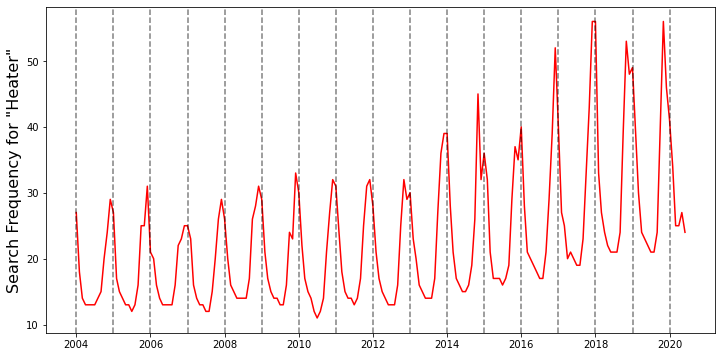

In [13]:
plot_series(heater_series)

# Normalize

In [15]:
avg, dev = heater_series.mean(), heater_series.std()

In [16]:
heater_series = (heater_series - avg) / dev

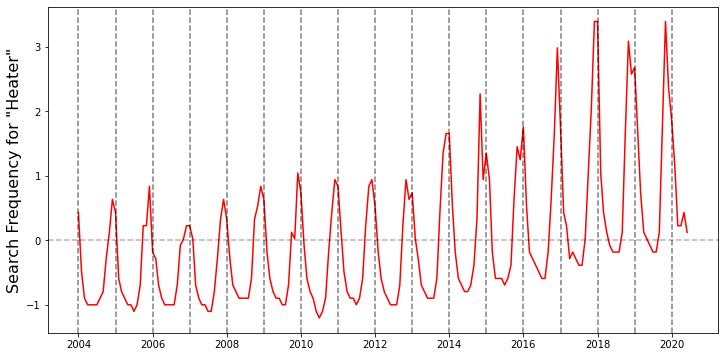

In [17]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Take First Difference to Remove Trend

In [ ]:
heater_series = heater_series.diff().dropna()

In [ ]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Increasing Volatility

In [ ]:
annual_volatility = heater_series.groupby(heater_series.index.year).std()

In [ ]:
annual_volatility

In [ ]:
heater_annual_vol = heater_series.index.map(lambda d: annual_volatility.loc[d.year])

In [ ]:
heater_annual_vol

In [ ]:
heater_series = heater_series / heater_annual_vol

In [ ]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Seasonality

In [ ]:
month_avgs = heater_series.groupby(heater_series.index.month).mean()

In [ ]:
month_avgs

In [ ]:
heater_month_avg = heater_series.index.map(lambda d: month_avgs.loc[d.month])

In [ ]:
heater_month_avg

In [ ]:
heater_series = heater_series - heater_month_avg

In [ ]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)